<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Multiple linear regression – advanced regression analysis 1

© ExploreAI Academy

In this notebook, we will delve deeper into multiple linear regression. We employ statistical tests and diagnostics from the Statsmodels library to assess model quality comprehensively. Using the mtcars dataset, we explore linearity and multicollinearity, as well as fit a model, enriching our regression analysis toolkit.

## Learning objectives

By the end of this notebook, you should be able to:
* Understand the importance of statistical diagnostics in regression analysis.
* Perform exploratory data analysis on a regression dataset.
* Check for linearity between predictor and response variables.
* Identify and address multicollinearity issues in the dataset.
* Fit a multiple linear regression model using Statsmodels and interpret its summary 


## Introduction

Previously, we explored the use of `sklearn` and multiple predictors to fit a regression model. When it comes to regression, there aren't many metrics and tools available in `sklearn` that allow us to assess the quality of our fitted models. Moreover, we require further techniques that will enable us to validate the characteristics of our initial data prior to conducting any modelling.  

In order to more accurately assess a regression model's quality, we go over a thorough set of methods that centre on statistical testing. This train is an adaptation of [this Medium article](https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685).

## The dataset: `mtcars`

For this train, we continue to make use of the `mtcars` dataset, to which we've already been introduced. We begin by importing some libraries, which will help us load and explore our data. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
#Load the data 
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/mtcars.csv', index_col=0)
df.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
#Explore the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


It appears both `vs` and `am` are categorical variables. From the dataset description [available here](https://rpubs.com/neros/61800), `vs` takes on a value of 0 or 1 depending on whether the engine layout is a *V* or *straight*. `am` also takes on a value of 0 or 1 depending on whether the transmission is *automatic* or *manual*.

Note that these don't need to be one-hot encoded because they are binary categorical variables (only two categories each), and they already make use of zeros and ones.

## Checking for linearity

The first step in our analysis involves assessing the mathematical relationship between each predictor variable and the response variable. Linearity is a crucial aspect that we need to evaluate. A linear relationship implies that the change in the response variable *Y*, resulting from a one-unit change in the predictor $X_j$, remains consistent across different values of $X_j$.

If we attempt to fit a regression model to a dataset that exhibits non-linear patterns, the model may inadequately capture the underlying relationships within the data, leading to inaccuracies in predictions. To assess linearity, we often create scatter plots for each predictor against the response variable. This visual examination helps us identify any apparent linear trends in the data.


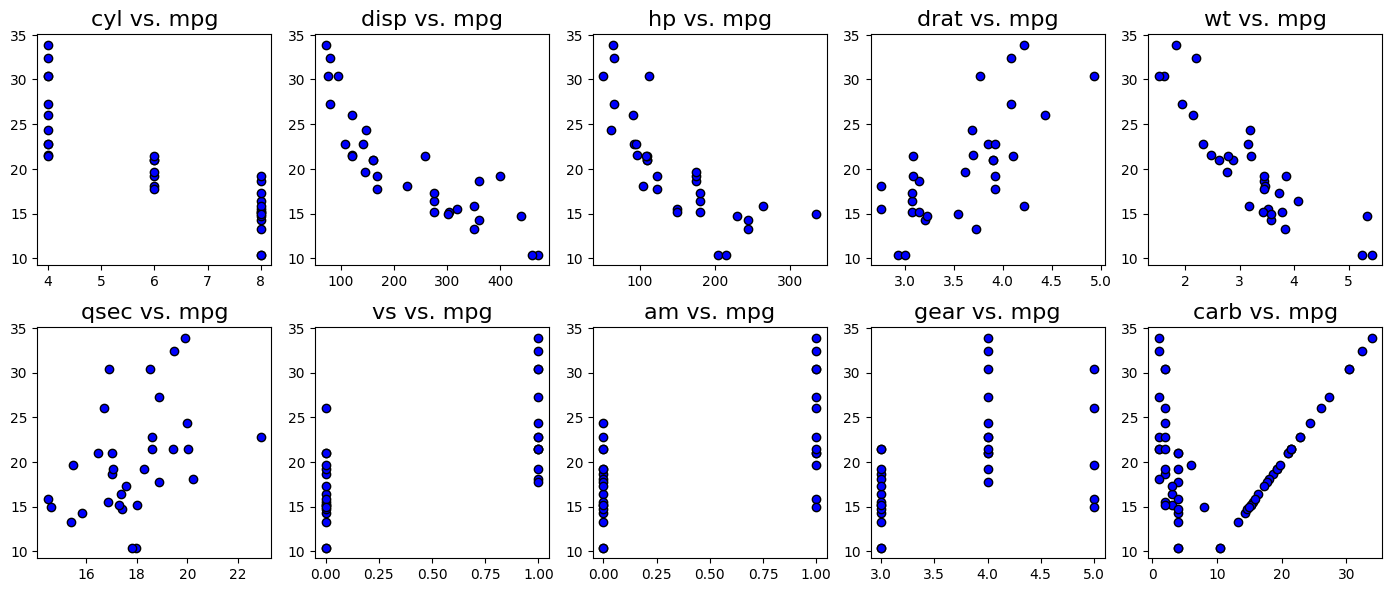

In [5]:
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. mpg".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['mpg'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

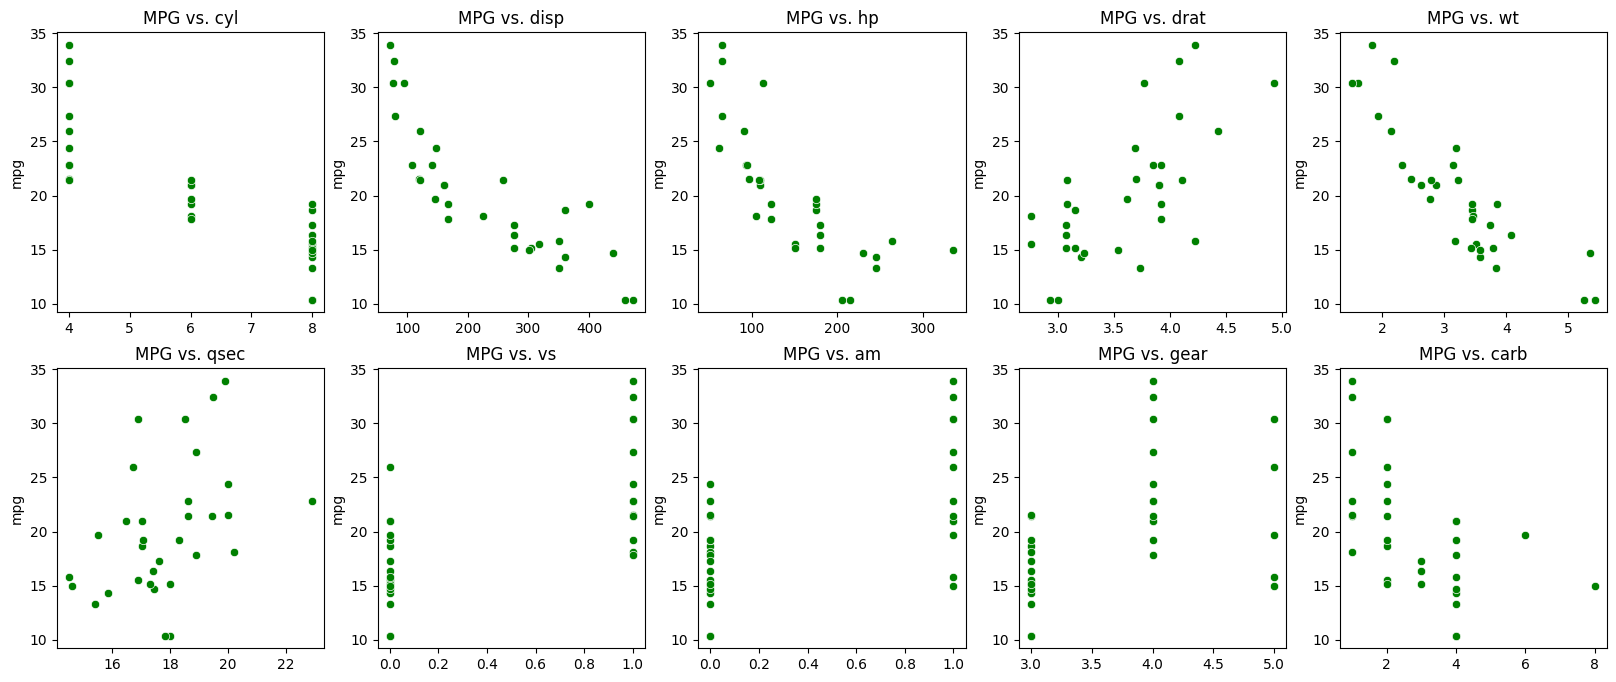

In [6]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/mtcars.csv', index_col=0) 
dataset.head() 

# Testing Linearity 
df_columns = list(dataset.columns[1:])

# Plotting 
fig, ax = plt.subplots(2, 5, figsize=(20, 8)) 
ax = ax.flatten() 

for index, column in enumerate(df_columns):
    sns.scatterplot(x=dataset[column], y=dataset["mpg"], color="green", ax=ax[index])
    ax[index].set_title(f"MPG vs. {column}")
    ax[index].set_xlabel("") # Turn off x labels
    

It appears that a significant amount of our variables have an approximately linear relationship. Here, a trend between each of `disp, hp, drat, wt`, `qsec`, and `mpg` seems to exist.

Based on these findings, it appears that there is enough linearity present to apply a linear regression model. Let us proceed.

We'll make a duplicate of the dataset to experiment with and process it with `statsmodels.OLS()`, the least squares regression module in the `statsmodels` library. We'll use this module to perform our regression.

In [7]:
df1 = df.copy()

In [8]:
# Make a Copy of my dataset 
dataset_copy = dataset.copy()

## Checking for multicollinearity

Multicollinearity refers to the presence of a strong correlation among two or more of the predictor variables in the dataset. The presence of any correlation among predictors is detrimental to model quality for two reasons:

1.  It tends to increase the standard error of the coefficients estimates, making them less precise and leading to wider confidence intervals.

2. It becomes difficult to estimate the effect of any one predictor variable on the response variable because multicollinearity makes the coefficients sensitive to small changes in the model or the data, which can lead to unstable coefficient estimates.

We will test for multicollinearity by creating paired scatter plots of predictors and then creating a correlation heatmap.

### Pairwise scatter plots

As can be inferred by the name, a pairwise scatter plot matrix simply produces an $n \times n$ matrix, where $n$ is the total number of variables compared. Each cell in this matrix represents the relationship between two variables. The diagonal cells of this visual matrix represent the comparison of a variable with itself. However, instead of displaying a scatter plot comparison, these diagonal cells typically contain a histogram or a density plot representing the univariate distribution of each variable. This allows for visualising the distribution of values taken by each variable.


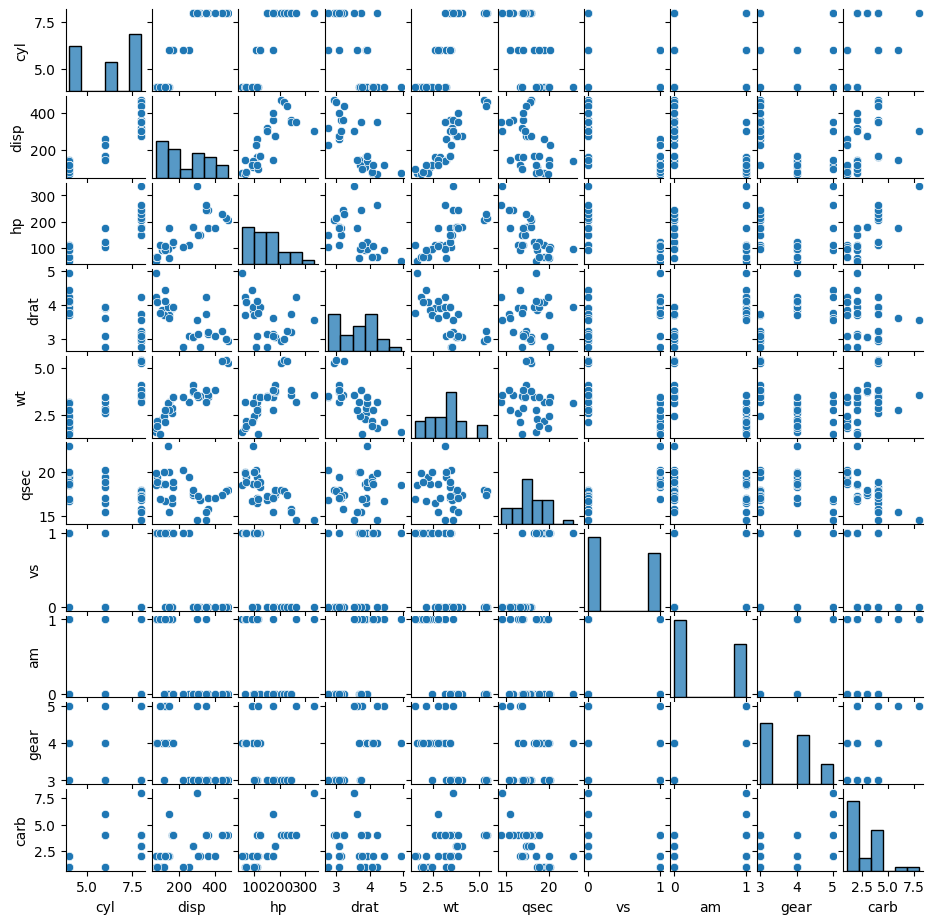

In [9]:
# Due to the number of visuals created, this codeblock takes about one minute to run.
from seaborn import pairplot
g = pairplot(df1.drop('mpg', axis='columns'))
g.fig.set_size_inches(9,9) 

### Correlation heatmap

Another way we can visually discover linearity between two or more variables within our dataset is through the use of a correlation heatmap. Similar to the pairwise scatter plot we produced above, this visual presents a matrix in which each row represents a distinct variable, with each column representing the correlation between this variable and another one within the dataset. Remember, when the absolute value of the correlation coefficient is close to one, it indicates a strong linear relationship between the variables.  

In [23]:
# We only compare the predictor variables, and thus drop the target `mpg` column.
corr = df1.drop('mpg', axis='columns').corr()

corr 

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073
carb,0.526988,0.394977,0.749812,-0.090790,0.427606,-0.656249,-0.569607,0.057534,0.274073,1.000000


In [13]:
from statsmodels.graphics.correlation import plot_corr 

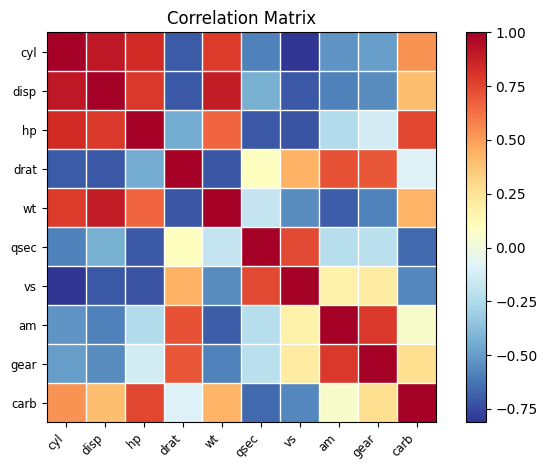

In [ ]:
fig=plot_corr(corr,xnames=corr.columns)

Text(0.5, 1.0, 'Correlation Matrix')

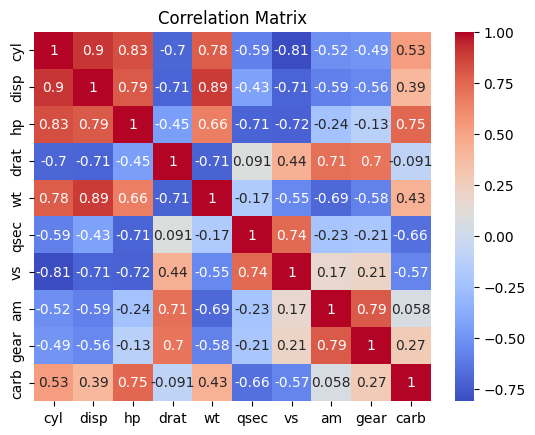

In [27]:
# using correlaiton matrix to check multi-colinearity
corr_matrix = dataset.drop(["mpg"], axis="columns").corr()

# Visualize the matrix using the heatmap 
sns.heatmap(
    data=corr_matrix,
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix")

From both the pairwise scatterplot and correlation heatmap, we can see several strong correlations among predictors.

Let's keep these in mind as we continue to check the quality of our model.

## Fitting the model using `statsmodels.OLS`

As previously stated, `sklearn` has limited metrics and tools for evaluating the suitability of the regression models we fit. Thus, to broaden our scope, we import the `statsmodels` library, which contains a diverse range of statistical methods.

In [29]:
import statsmodels.formula.api as sm 

### Generating the regression string

Those who are familiar with the R language will know that fitting a machine learning model often involves specifying the relationship between variables using a formula interface. In this interface, a string of the form:

`y ~ X`

is commonly used, where:
- *y* represents the response variable.
- $X$ represents one or more predictor variables.

The string is read as "Regress *y* on $X$", indicating that we want to model the relationship between the response variable *y* and the predictor variable(s) $X$.

Similarly, in Python's `statsmodels` library, the formula interface is used for specifying regression models. We need to generate an appropriate string following this pattern to specify the model when fitting a regression model using the formula interface. For example, *y* ~ $X_1$ + $X_2$ represents a model where *y* is regressed on predictor variables $X_1$ and $X_2$.


In [28]:
df_columns

['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

In [30]:
formula_str = df1.columns[0]+' ~ '+'+'.join(df1.columns[1:])
formula_str 

'mpg ~ cyl+disp+hp+drat+wt+qsec+vs+am+gear+carb'

In [35]:
# Creating the formular string to fit the model 

predictors = df_columns.copy() 

formular_string = "mpg ~ " + "+".join(predictors) 

# fit the model 
model_ols = sm.ols(formular_string, data=dataset_copy) 

fitted_model_ols = model_ols.fit() 

fitted_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           3.79e-07
Time:                        11:17:22   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In other words, we will regress `mpg` on all of the predictors.

### Construct and fit the model

We now go ahead and fit our model. We use the `ols` or Ordinary Least Squares regression model from the `statsmodels` library to do this:  

In [17]:
model=sm.ols(formula=formula_str, data=df1)

In [18]:
fitted = model.fit()

### Print model summary

Unlike the `sklearn` models we've seen so far which only produce a couple of statistics following the fitting process, our new model produces a rich set of statistics to help us analyse its appropriateness.   

In [19]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           3.79e-07
Time:                        09:16:13   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

The above result provides the summary output of the multiple linear regression model fitted to the data.

On the top of the summary report, we'll find the **Model information section**, which provides details about the type of model utilised and the estimation method employed. Following this, the **Model fit** section offers crucial metrics such as R-squared and adjusted R-squared, providing insights into how well the model fits the data. 

Additionally, the F-statistic, accompanied by its associated p-value, evaluates the overall significance of the model. Moving further down, the **Coefficients table** displays estimates, standard errors, t-values, and p-values for each predictor variable, elucidating their individual significance and impact on the dependent variable. 

Lastly, we'll encounter additional diagnostics, encompassing various diagnostic tests aimed at assessing the model's assumptions and identifying potential issues like multicollinearity or non-normality of residuals. This succinct summary encapsulates the most salient components of a stats model summary report, offering a comprehensive overview of the model's performance and reliability.



#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>